In [3]:
!pip install nltk

In [4]:
!pip install textblob

In [5]:
!pip install wordcloud

In [6]:
!pip install keras tensorflow

In [7]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk import FreqDist

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
text='Food is honestly one of my favorite things to talk about. There is just so much variety, and it never gets boring.I love trying new snacks.It is fun, creative, and super comforting when you are stressed. Honestly, good food can totally make my day.'
text_lower=text.lower()
text_clean=text_lower.translate(str.maketrans('', '', string.punctuation))
print("Cleaned text: ", text_clean)

Cleaned text:  food is honestly one of my favorite things to talk about there is just so much variety and it never gets boringi love trying new snacksit is fun creative and super comforting when you are stressed honestly good food can totally make my day


In [9]:
word_tokens=word_tokenize(text_clean)
sent_tokens=sent_tokenize(text)

print("Text after word tokenization: ", word_tokens)
print("Text after sentence tokenization: ", sent_tokens)

Text after word tokenization:  ['food', 'is', 'honestly', 'one', 'of', 'my', 'favorite', 'things', 'to', 'talk', 'about', 'there', 'is', 'just', 'so', 'much', 'variety', 'and', 'it', 'never', 'gets', 'boringi', 'love', 'trying', 'new', 'snacksit', 'is', 'fun', 'creative', 'and', 'super', 'comforting', 'when', 'you', 'are', 'stressed', 'honestly', 'good', 'food', 'can', 'totally', 'make', 'my', 'day']
Text after sentence tokenization:  ['Food is honestly one of my favorite things to talk about.', 'There is just so much variety, and it never gets boring.I love trying new snacks.It is fun, creative, and super comforting when you are stressed.', 'Honestly, good food can totally make my day.']


In [10]:
sent_split=text.split()
print("Text after tokenization done using split()", sent_split)

Text after tokenization done using split() ['Food', 'is', 'honestly', 'one', 'of', 'my', 'favorite', 'things', 'to', 'talk', 'about.', 'There', 'is', 'just', 'so', 'much', 'variety,', 'and', 'it', 'never', 'gets', 'boring.I', 'love', 'trying', 'new', 'snacks.It', 'is', 'fun,', 'creative,', 'and', 'super', 'comforting', 'when', 'you', 'are', 'stressed.', 'Honestly,', 'good', 'food', 'can', 'totally', 'make', 'my', 'day.']


In [11]:
stop_words = set(stopwords.words('english'))
filter= [i for i in word_tokens if i.lower() not in stop_words]
print("Filtered Words:", filter)

Filtered Words: ['food', 'honestly', 'one', 'favorite', 'things', 'talk', 'much', 'variety', 'never', 'gets', 'boringi', 'love', 'trying', 'new', 'snacksit', 'fun', 'creative', 'super', 'comforting', 'stressed', 'honestly', 'good', 'food', 'totally', 'make', 'day']


<Axes: title={'center': 'Top Words'}, xlabel='Samples', ylabel='Counts'>

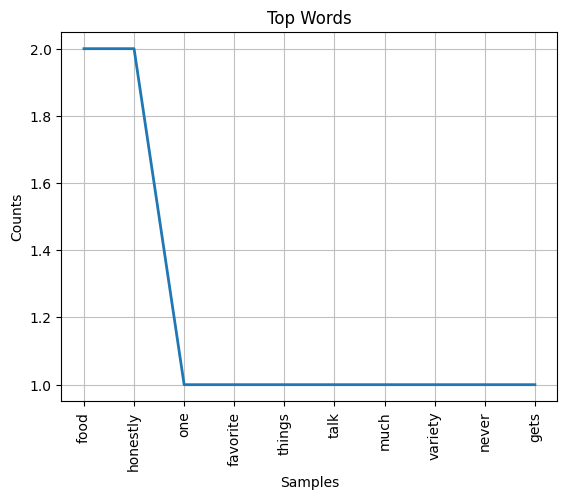

In [12]:
fd = FreqDist(filter)
fd.plot(10, title="Top Words")

In [13]:
only_alpha = re.findall(r'\b[a-zA-Z]+\b', text)
print(only_alpha)

['Food', 'is', 'honestly', 'one', 'of', 'my', 'favorite', 'things', 'to', 'talk', 'about', 'There', 'is', 'just', 'so', 'much', 'variety', 'and', 'it', 'never', 'gets', 'boring', 'I', 'love', 'trying', 'new', 'snacks', 'It', 'is', 'fun', 'creative', 'and', 'super', 'comforting', 'when', 'you', 'are', 'stressed', 'Honestly', 'good', 'food', 'can', 'totally', 'make', 'my', 'day']


In [14]:
ps=PorterStemmer()
stemmed=[ps.stem(i) for i in filter]
print("Stemmed words: ", stemmed)

Stemmed words:  ['food', 'honestli', 'one', 'favorit', 'thing', 'talk', 'much', 'varieti', 'never', 'get', 'boringi', 'love', 'tri', 'new', 'snacksit', 'fun', 'creativ', 'super', 'comfort', 'stress', 'honestli', 'good', 'food', 'total', 'make', 'day']


In [15]:
l=WordNetLemmatizer()
lemmatized=[l.lemmatize(i.lower()) for i in filter]
print("Lemmatized words: ", lemmatized)

Lemmatized words:  ['food', 'honestly', 'one', 'favorite', 'thing', 'talk', 'much', 'variety', 'never', 'get', 'boringi', 'love', 'trying', 'new', 'snacksit', 'fun', 'creative', 'super', 'comforting', 'stressed', 'honestly', 'good', 'food', 'totally', 'make', 'day']


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
lines = ["Sound quality is crisp with deep bass, and noise cancellation works like a charm", "Battery life easily lasts through the day", "Worth every penny"]
cv = CountVectorizer()
X = cv.fit_transform(lines)
print(cv.get_feature_names_out())
print(X.toarray())

['and' 'bass' 'battery' 'cancellation' 'charm' 'crisp' 'day' 'deep'
 'easily' 'every' 'is' 'lasts' 'life' 'like' 'noise' 'penny' 'quality'
 'sound' 'the' 'through' 'with' 'works' 'worth']
[[1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0]
 [0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1]]


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(lines)
print(tfidf.get_feature_names_out())
print(tfidf_matrix.toarray())
features=tfidf.get_feature_names_out()

['and' 'bass' 'battery' 'cancellation' 'charm' 'crisp' 'day' 'deep'
 'easily' 'every' 'is' 'lasts' 'life' 'like' 'noise' 'penny' 'quality'
 'sound' 'the' 'through' 'with' 'works' 'worth']
[[0.2773501  0.2773501  0.         0.2773501  0.2773501  0.2773501
  0.         0.2773501  0.         0.         0.2773501  0.
  0.         0.2773501  0.2773501  0.         0.2773501  0.2773501
  0.         0.         0.2773501  0.2773501  0.        ]
 [0.         0.         0.37796447 0.         0.         0.
  0.37796447 0.         0.37796447 0.         0.         0.37796447
  0.37796447 0.         0.         0.         0.         0.
  0.37796447 0.37796447 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.57735027 0.         0.
  0.         0.         0.         0.57735027 0.         0.
  0.         0.         0.         0.         0.57735027]]


In [18]:
for i in range(len(lines)):
    print("Text ", i+1)
    row = tfidf_matrix[i].toarray()[0]
    top = row.argsort()[-3:][::-1]
    for i in top:
        print(f"{features[i]}")

Text  1
works
with
quality
Text  2
through
the
battery
Text  3
worth
every
penny


In [19]:
text1 = set("IoT connects everyday devices to the internet, enabling real-time data exchange".split())
text2 = set("Virtual Reality immerses users in a simulated 3D environment using headsets and motion tracking".split())
jaccard = len(text1 & text2) / len(text1 | text2)
print("Jaccard Similarity:", jaccard)

Jaccard Similarity: 0.0


In [20]:
from sklearn.metrics.pairwise import cosine_similarity
tfidf_vec = TfidfVectorizer()
vecs = tfidf_vec.fit_transform(["IoT connects everyday devices to the internet, enabling real-time data exchange", "Virtual Reality immerses users in a simulated 3D environment using headsets and motion tracking"])
cos_sim = cosine_similarity(vecs[0:1], vecs[1:2])
print("Cosine Similarity:", cos_sim[0][0])

Cosine Similarity: 0.0


In [21]:
from textblob import TextBlob
review='This Bluetooth speaker is really good for its size. The sound is clear and has nice bass. The battery lasts all day. It connects to my phone easily. Great speaker for the price! '
blob = TextBlob(review)
polarity=blob.sentiment.polarity
print("Polarity:", blob.sentiment.polarity)
print("Subjectivity:", blob.sentiment.subjectivity)

Polarity: 0.4416666666666667
Subjectivity: 0.6055555555555555


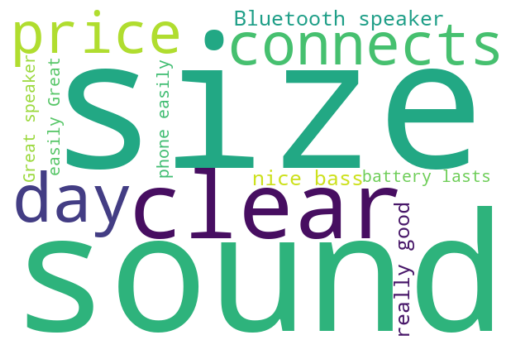

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
positive_text = ""
for r in review:
    blob = TextBlob(review)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        positive_text += review + " "


wc = WordCloud(width=600, height=400, background_color='white').generate(positive_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np


data='Artificial Intelligence (AI) is changing the way we live and work. From voice assistants that answer our questions to smart systems that recommend movies or detect fraud, AI is becoming part of everyday life. It helps businesses make faster decisions by analyzing large amounts of data quickly. In healthcare, AI can assist doctors by identifying patterns in medical scans. While there are concerns about job loss and privacy, many experts believe AI will create new opportunities and improve efficiency. As technology advances, learning how AI works will be important for both individuals and organizations.'
tokenizer = Tokenizer()
fin=tokenizer.fit_on_texts([data])
sequences = []
words = data.split()
for i in range(1, len(words)):
    seq = words[:i+1]
    tokenized_seq = tokenizer.texts_to_sequences([' '.join(seq)])[0]
    sequences.append(tokenized_seq)
padded = pad_sequences(sequences)
print(padded)

[[ 0  0  0 ...  0  9 10]
 [ 0  0  0 ...  9 10  1]
 [ 0  0  0 ... 10  1  3]
 ...
 [ 0  0  9 ... 78 79 80]
 [ 0  9 10 ... 79 80  2]
 [ 9 10  1 ... 80  2 81]]


In [24]:
X = padded[:, :-1]
y = padded[:, -1]
y = np.array(y)

total_words = len(tokenizer.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=10, input_length=X.shape[1]))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, epochs=100, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
